[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ncerdan/HandsOnML/blob/master/Ch_09_Unsupervised_Learning.ipynb)

# Clustering

## K-Means

In [2]:
# make out dataset
from sklearn.datasets import make_blobs
import numpy as np

blob_centers = np.array([
    [ 0.2,  2.3],
    [-1.5 ,  2.3],
    [-2.8,  1.8],
    [-2.8,  2.8],
    [-2.8,  1.3]                     
])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std)

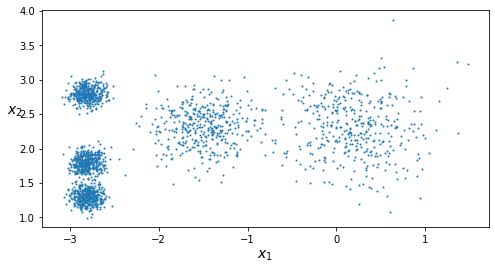

In [3]:
# now lets plot them
import matplotlib.pyplot as plt

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [4]:
# now let's train on the clusters
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)


In [5]:
# KMeans instance saves the label of each instance it was trained on
print(kmeans.labels_)
print(y_pred)

[1 2 2 ... 3 4 2]
[1 2 2 ... 3 4 2]


In [6]:
# it also stores the centroids
kmeans.cluster_centers_

array([[-2.80231767,  1.80139944],
       [ 0.20404944,  2.30548137],
       [-1.4730556 ,  2.32436007],
       [-2.79439618,  2.79406388],
       [-2.80119472,  1.3032836 ]])

In [7]:
# now you can easily predict new data
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 3, 3], dtype=int32)

In [8]:
# you can see the score of each class for data as follows
kmeans.transform(X_new)

array([[2.80934627, 0.36736227, 1.50834421, 2.90502796, 2.88653868],
       [5.8057155 , 2.81258927, 4.48480054, 5.84855235, 5.84288233],
       [1.21479282, 3.27845832, 1.66974504, 0.29100278, 1.70832376],
       [0.72603102, 3.20994865, 1.53701288, 0.35881262, 1.21311734]])

### Centroid Initialization Methods

In [9]:
# you can manual set the init if you happen to know roughly where they should be
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)     # n_inits controls how many times to run the algorithm (default = 10)

In [10]:
# can view a models performance via its inertia (runs n_init times and picks one with lowest inertia)
kmeans.fit(X)
kmeans.inertia_

222.230809752018

In [11]:
# its score contains the negative inertia
kmeans.score(X)

-222.23080975201788

### Accelerated K-Means and Mini-Batch K-Means

In [12]:
# sklearn runs accelerated by default

In [13]:
# sklearn implements the mini-batch version as follows
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [14]:
# if data does not fit in memory you can either use np.memmap (see Chp 8) or just
# run partial_fit on each mini-batch 

### Finding the Optimal Number of Clusters


In [15]:
# to see the silhouette score you can use this function
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.6507664920271871

## Using Clustering for Image Segmentation

In [ ]:
# load the image
from matplotlib.image import imread
import os

image = imread(os.path.join('images', 'ladybug.png'))   # only works when running on local NOT on colab
image.shape

In [ ]:
# run clustering for color segmentation
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]   # converts each instace to have value of its center
segmented_img = segmented_img.reshape(image.shape)

## Using Clustering for Preprocessing

In [ ]:
# first load the data set
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

In [ ]:
# split up data set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [ ]:
# first try a classifier without any preprocessing
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# and check its score
log_reg.score(X_test, y_test)

0.9622222222222222

In [ ]:
# let's create a pipeline with K-Means preprocessing
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=50)),
    ('log_reg', LogisticRegression())
])

pipeline.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=50, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [ ]:
# and check its score
pipeline.score(X_test, y_test)  # look it got better

0.9644444444444444

In [ ]:
# now let's try using gridsearch to find the best number of clusters
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

In [ ]:
# let's see what it found
grid_clf.best_params_

{'kmeans__n_clusters': 90}

In [ ]:
# now let's see its performance
grid_clf.score(X_test, y_test)      # should in theory be better

0.9555555555555556

## Using Clustering for Semi-Supervised Learning

In [ ]:
# create a data set that has few labels
n_labeled = 50
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# check its score
log_reg.score(X_test, y_test)

0.7755555555555556

In [ ]:
# now create representative images
k = 50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digits_ids = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digits_ids]

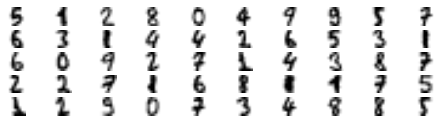

In [ ]:
# plot the representatives
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

In [ ]:
# create the labels
y_representative_digits = np.array([
    5, 1, 2, 8, 0, 4, 9, 9, 5, 7,
    6, 3, 1, 4, 4, 2, 6, 5, 3, 1,
    6, 0, 9, 2, 7, 1, 4, 3, 8, 7,
    2, 2, 7, 8, 6, 8, 8, 1, 7, 5,
    1, 2, 9, 0, 7, 3, 4, 8, 8, 5
])

In [ ]:
# now lets train in
log_reg = LogisticRegression()
log_reg.fit(X_representative_digits, y_representative_digits)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# check its performance
log_reg.score(X_test, y_test)   # does better than before!

0.8688888888888889

In [ ]:
# we can also propogate labels
y_train_propogate = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propogate[kmeans.labels_==i] = y_representative_digits[i]

In [ ]:
# now lets train again
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_propogate)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# and its performance:
log_reg.score(X_test, y_test)       # even better!

0.9088888888888889

In [ ]:
# now we can try to limit this propogation to only the top 20%
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_dist = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_dist)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propogated = (X_cluster_dist != -1)
X_train_partially_propogated = X_train[partially_propogated]
y_train_partially_propogated = y_train[partially_propogated]

In [ ]:
# now let's train the data
log_reg = LogisticRegression()
log_reg.fit(X_train_partially_propogated, y_train_partially_propogated)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# and check it's performance
log_reg.score(X_test, y_test)   # and now it got even better

0.92

In [ ]:
# this words well because most of the propogated labels are correct
np.mean(y_train_partially_propogated == y_train[partially_propogated])

1.0

## DBSCAN

In [ ]:
# let's make the data set and train DBSCAN on it
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [ ]:
# you can view the labels here
dbscan.labels_      # -1 means anomaly

array([ 0,  0,  0,  1,  0,  0,  0,  5, -1,  1,  0,  2,  0,  3,  7,  7,  4,
        1,  4,  0,  2,  0,  5,  0,  0,  0,  0,  1,  0,  0,  5,  3,  0,  0,
        0,  0,  0,  3,  0, -1,  3,  5,  0,  0,  0,  0, -1,  4,  4,  3,  0,
        4,  7,  5,  0,  6,  0,  5,  0,  5,  2, -1,  0,  0,  0,  0,  0,  4,
        4,  5,  4,  5,  5,  1,  4,  3,  3,  3,  3,  2,  0,  2,  2, -1,  0,
        0,  0,  0,  2,  0,  5,  0, -1,  0,  4,  0,  1,  5, -1,  3,  0,  0,
        1,  0,  0,  4,  0,  0,  2,  4,  5,  4,  4,  2,  0,  3,  4,  0,  0,
        4,  2,  0,  0,  6,  5, -1,  0,  2,  3,  4,  0,  0,  0,  2,  7, -1,
        4, -1,  0,  4,  3,  1,  0,  5,  4,  0,  0,  2,  3,  0, -1,  0,  1,
        3,  0,  0,  5,  4,  0, -1,  1,  0,  0,  4,  0,  1,  0,  1,  3,  1,
        3,  5,  5,  3,  3,  0,  0,  3,  4,  0,  0,  5,  0,  0,  7,  0,  4,
        5,  3,  0,  0,  3,  1,  3,  0,  0,  4,  2,  0,  0,  3,  0,  0,  2,
        4,  4,  4,  5,  0,  0,  0,  0,  1,  5,  5,  1,  0,  2,  0,  3,  5,
        0,  0,  5,  5,  4

In [ ]:
# this can show the indeces of the core instances
# dbscan.core_sample_indices_

# this shows how many core instances there are
print(len(dbscan.components_))

808


In [ ]:
# notice that there are a lot of clusters. this is wrong!
# let's try increasing eps
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [ ]:
# let's see how many classes there are
dbscan.labels_      # now there are only two!

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
# this class does not come with a predict() function, so instead you
# have to use your own classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])    # notice that we only train on core instances

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [ ]:
# now that its trained, we can predict new data points
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
print(knn.predict(X_new))
print(knn.predict_proba(X_new))

[1 0 1 0]
[[0.24 0.76]
 [1.   0.  ]
 [0.22 0.78]
 [1.   0.  ]]


# Gaussian Mixtures

In [16]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [17]:
# now lets look at the estimated parameters
print(gm.weights_)
print(gm.means_)
print(gm.covariances_)

[0.19999841 0.59999184 0.20000975]
[[-1.49884245  2.32506107]
 [-2.8038381   1.96681948]
 [ 0.18836316  2.30521645]]
[[[ 8.85933378e-02  4.15274842e-03]
  [ 4.15274842e-03  8.02016424e-02]]

 [[ 9.71591273e-03 -5.95041161e-05]
  [-5.95041161e-05  3.96009074e-01]]

 [[ 1.67181633e-01 -7.51903441e-03]
  [-7.51903441e-03  1.75681158e-01]]]


In [18]:
# can see if/when the EM algorithm converged
print(gm.converged_)
print(gm.n_iter_)

True
3


In [19]:
# now it can easily do both hard and soft classification

# hard
print(gm.predict(X[:5]))

# soft
print(gm.predict_proba(X[:5]))

[2 0 0 2 0]
[[2.06870545e-004 3.24545836e-152 9.99793129e-001]
 [9.98353204e-001 1.04393246e-054 1.64679567e-003]
 [9.99615490e-001 1.74675697e-043 3.84509686e-004]
 [3.66868763e-002 3.00280524e-111 9.63313124e-001]
 [9.99978888e-001 4.73745329e-028 2.11116362e-005]]


In [21]:
# since its a generative model, you can sample new data points
X_new, y_new = gm.sample(6)
print(X_new)
print(y_new)

[[-2.73968389  1.82119642]
 [-2.83449893  2.2912512 ]
 [-2.8214151   1.74145312]
 [-2.83380345  2.23370234]
 [-2.86170888  1.47970252]
 [-2.80721433  1.91193056]]
[1 1 1 1 1 1]


In [23]:
# can also estimate the density of the model at a given instance
# the score_sample() function returns the log of the estimated PDF,
# so the higher the score the higher the estimated density. therefore,
# if you compute the exponential of these scores, you will get the pdf
gm.score_samples(X[:5])

array([-2.19168163, -1.37944729, -1.92519714, -3.78724079, -1.47806188])

## Anomaly Detection Using Gaussian Mixture Models

In [24]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)     # for 4%
anomalies = X[densities < density_threshold]

## Selecting the Number of Clusters

In [25]:
# can see a models BIC and AIC:
print('BIC: ', gm.bic(X))
print('AIC: ', gm.aic(X))

BIC:  5178.489767329595
AIC:  5083.27442551738


## Bayesian Gaussian Mixture Models

In [27]:
# you can use Bayesian GM by overshooting the number of components and
# it will set weights close to 0 for those gaussians that are unused
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)
np.round(bgm.weights_, 2)   # only used 5 clusters

array([0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0. , 0. , 0. , 0. ])